# **STATS 503, Homework 10: Neural Networks and Gradient Descent for Classification**

---



**Submission instructions:** Upon completion, please run the entire notebook, export the notebook and output as html, and upload this html to Canvas.


# Part 1: Textbook exercises



1.   ISLP chapter 10 exercise \#1, parts (a), (b), and (d)
2.   ISLP chapter 10 exercise \#2
3.   ISLP chapter 10 exercise \#4, parts (b) (c) and (d)
4.   ISLP chapter 10 exercise \#6

## 1.   ISLP chapter 10 exercise \#1, parts (a), (b), and (d)

#### (a)

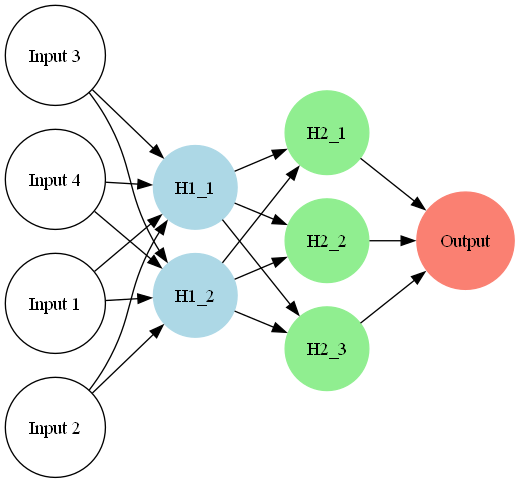

In [3]:
from graphviz import Digraph
from IPython.display import Image, display
net = Digraph('Neural_Network', format='png')
net.attr(rankdir='LR') 
for i in range(1, 5):
    net.node(f'I{i}', f'Input {i}', shape='circle')
for i in range(1, 3):
    net.node(f'H1_{i}', f'H1_{i}', shape='circle', style='filled', color='lightblue')
for i in range(1, 4):
    net.node(f'H2_{i}', f'H2_{i}', shape='circle', style='filled', color='lightgreen')
net.node('O1', 'Output', shape='circle', style='filled', color='salmon')
for i in range(1, 5):    
    for j in range(1, 3):
        net.edge(f'I{i}', f'H1_{j}')
for i in range(1, 3):    
    for j in range(1, 4):
        net.edge(f'H1_{i}', f'H2_{j}')
for i in range(1, 4):
    net.edge(f'H2_{i}', 'O1')
display(Image(net.pipe(format='png')))

#### (b)

f(x)=$\sum^{n}_{j=1}w_j*ReLU(\sum^{2}_{k=1}w_{jk}*ReLU(\sum^{4}_{l=1}w_{kl}x_l+b_k)+b_j)+b$

#### (d)

2*4+2+2*3+3+3+1=23

## 2.   ISLP chapter 10 exercise \#2

#### (a)

$f_m(X)=Pr(Y=m|X)=\frac{e^{Z_m+c}}{\sum^{9}_{l=0}e^{Z_l+c}}=\frac{e^c*e^{Z_m}}{e^c*\sum^{9}_{l=0}e^{Z_l}}=\frac{e^{Z_m}}{\sum^{9}_{l=0}e^{Z_l}}$

#### (b)

$Pr(Y=k|X=x)=\frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}x_p+c_0+c_1+...+c_p}}{\sum^{K}_{l=1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p+c_0+c_1+...+c_p}}=\frac{e^{c_0+c_1+...+c_p}*e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}x_p}}{\sum^{K}_{l=1}e^{c_0+c_1+...+c_p}*e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p+c_0+c_1+...+c_p}}=\frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{kp}x_p}}{\sum^{K}_{l=1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}}$ 

## 3.   ISLP chapter 10 exercise \#4, parts (b) (c) and (d)

#### (b)

3*(5*5+1)=78

#### (c)

First of all, here CNN has 32*32=1024 pixels, and we make each of them one neuron, then use convolution as matrix multiplication, each convolution filter slides across the image, at each location computes a weighted sum over a small 5×5 patch, applies weights, adds bias, outputs one value, so this is a hidden unit in an FNN that only connects to 25 out of the 1024 input neurons.

Constraints: 1. In an ordinary FNN, every hidden unit is connected to every input. In a CNN, each hidden unit is only connected to a small local region .So, most weights in W are zero (no connection to distant pixels).

2. Shared weights:In an FNN, every hidden unit typically has its own set of weights.In a CNN, each filter is applied across all spatial positions, so all hidden units that detect the same feature share the exact same weights.
This is what gives CNNs translation invariance and efficiency.











#### (d)

32* 32* 2352+3* 28* 28=2410800

## 4.   ISLP chapter 10 exercise \#6

#### (a)

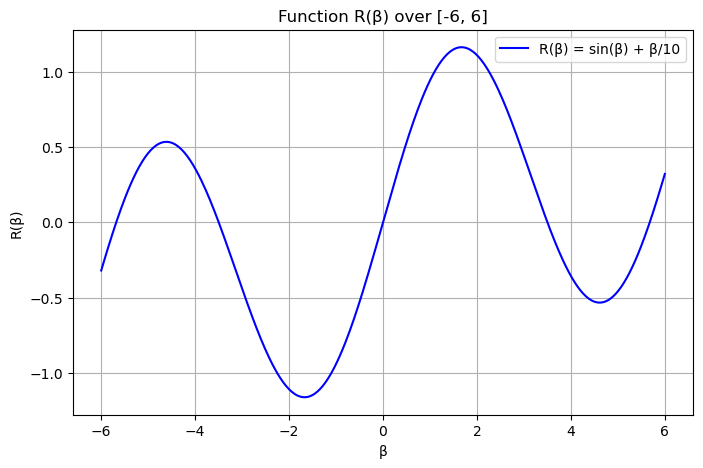

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def R(beta):
    return np.sin(beta) + beta / 10
beta_vals = np.linspace(-6, 6, 400)
R_vals = R(beta_vals)
plt.figure(figsize=(8, 5))
plt.plot(beta_vals, R_vals, label='R(β) = sin(β) + β/10', color='blue')
plt.title("Function R(β) over [-6, 6]")
plt.xlabel("β")
plt.ylabel("R(β)")
plt.grid(True)
plt.legend()
plt.show()

#### (b)

$cos(\beta)+\frac{1}{10}$

#### (c)

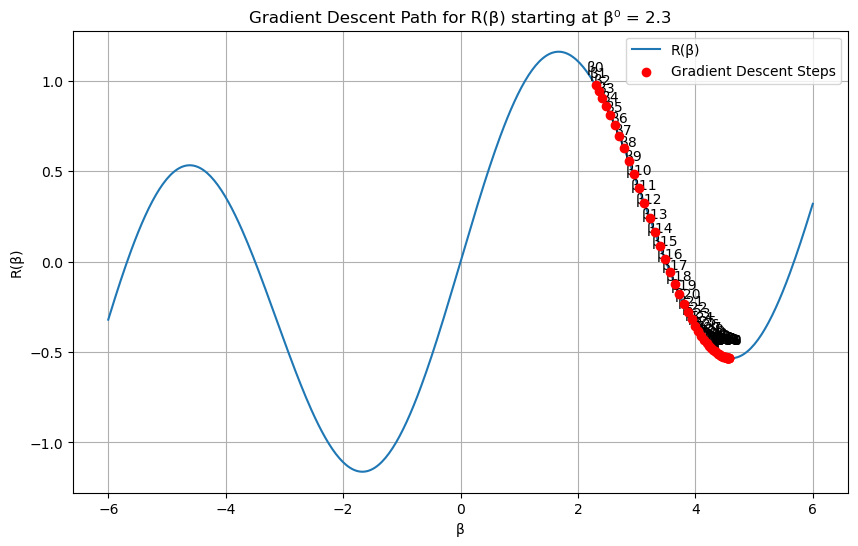

Final β after 50 steps: 4.5769


In [28]:
import numpy as np
import matplotlib.pyplot as plt
def R(beta):
    return np.sin(beta) + beta / 10
def dR(beta):
    return np.cos(beta) + 1/10
rho = 0.1  
beta = 2.3 
betas = [beta]
max_iter = 50
for _ in range(max_iter):
    grad = dR(beta)
    beta_new = beta - rho * grad
    if abs(beta_new - beta) < 1e-6: 
        break
    beta = beta_new
    betas.append(beta)
beta_range = np.linspace(-6, 6, 400)
r_vals = R(beta_range)
plt.figure(figsize=(10, 6))
plt.plot(beta_range, r_vals, label='R(β)')
plt.scatter(betas, [R(b) for b in betas], color='red', zorder=5, label='Gradient Descent Steps')
for i, b in enumerate(betas):
    plt.annotate(f'β{i}', (b, R(b)), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title("Gradient Descent Path for R(β) starting at β⁰ = 2.3")
plt.xlabel("β")
plt.ylabel("R(β)")
plt.legend()
plt.grid(True)
plt.show()
print(f"Final β after {len(betas)-1} steps: {betas[-1]:.4f}")

#### (d)

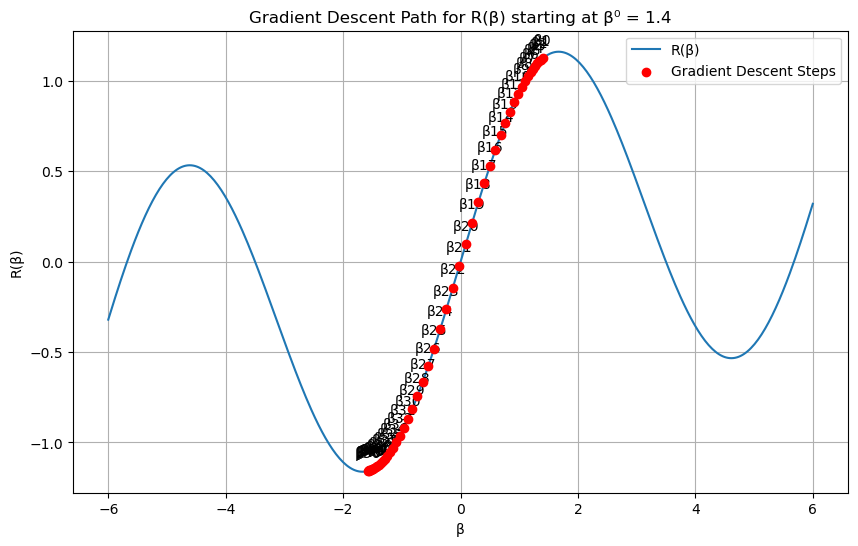

Final β after 50 steps: -1.5740


In [31]:
import numpy as np
import matplotlib.pyplot as plt
def R(beta):
    return np.sin(beta) + beta / 10
def dR(beta):
    return np.cos(beta) + 1/10
rho = 0.1
beta = 1.4 
betas = [beta]
max_iter = 50
for _ in range(max_iter):
    grad = dR(beta)
    beta_new = beta - rho * grad
    if abs(beta_new - beta) < 1e-6:
        break
    beta = beta_new
    betas.append(beta)
beta_range = np.linspace(-6, 6, 400)
r_vals = R(beta_range)
plt.figure(figsize=(10, 6))
plt.plot(beta_range, r_vals, label='R(β)')
plt.scatter(betas, [R(b) for b in betas], color='red', zorder=5, label='Gradient Descent Steps')
for i, b in enumerate(betas):
    plt.annotate(f'β{i}', (b, R(b)), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title("Gradient Descent Path for R(β) starting at β⁰ = 1.4")
plt.xlabel("β")
plt.ylabel("R(β)")
plt.legend()
plt.grid(True)
plt.show()
print(f"Final β after {len(betas)-1} steps: {betas[-1]:.4f}")

# Part 2: Multiclass Logistic Regression

In this part, we'll train a multiclass logistic regression module using gradient descent.

## Problem 1: One-hot encodings for multi-class data


If we have a vector $y'$ with dimensions $n \times 1$ that contains $m$ class labels stored in $l$ with dimensions $m \times 1$, the one-hot encoding is an $n \times m$ matrix $Y$ where $Y_{ij}$ is 1 if $z_i = l_j$ and 0 otherwise.

For example,
if
\begin{align*}
y' = \begin{bmatrix} \textrm{Sahana} \\
\textrm{Eduardo} \\
\textrm{Jake} \\
\textrm{Eduardo} \\
\textrm{Jake} \\
\textrm{Jake} \\
\textrm{Eduardo}
\end{bmatrix}
\text{ and }
l = \begin{bmatrix} \textrm{Sahana} \\
\textrm{Eduardo} \\
\textrm{Jake}
\end{bmatrix},
\end{align*}
then
\begin{align*}
Y = \begin{bmatrix} 1 & 0 & 0 \\
0 & 1& 0\\
0 & 0 & 1\\
0 & 1& 0\\
0 & 0 & 1\\
0 & 0 & 1\\
0 & 1 & 0
\end{bmatrix}
.
\end{align*}

You can think of the first column as indiciating whether $y'_i$ is Sahana, the second column as indiciating whether $y'_i$ is Eduardo, and third column as indiciating whether $y'_i$ is Jake.

Write a function that converts class labels to a one-hot encoding without using for (or while) loops across observations; loops across observations will be very time consuming when the sample size grows.
Instead, you should use numpy vectorization.
Loops iterating over the number of distinct labels are fine as the number of distinct labels is typically small.


Your function should return $Y$ (an $n \times m$ array) given $y'$ ($n \times 1$) and labels $l$ ($m \times 1$). You may use numpy's `where` function in your implementation.
The code block below contains further instructions.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# this part loads the iris dataset from sklearn and splits it
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data_iris = load_iris()
X_iris = data_iris.data
y_iris = data_iris.target

# add the intercept/bias term to X
n, p = X_iris.shape
ones = np.ones((n, 1))
X_iris = np.hstack((ones, X_iris))

In [35]:
#############################################################################
# TODO:                                                                     #
# Implement a one-hot encoding for a given y and l                          #
# Input: y_prime of shape (n, 1), l of shape (m, 1)                               #
# Output: Y of shape (n, m)                                                 #
#############################################################################

def one_hot_encoding(y_prime, l):
    # YOUR CODE HERE
    y_flat = y_prime.reshape(-1)  
    l_flat = l.reshape(-1)        
    Y = (y_flat[:, None] == l_flat[None, :]).astype(int)
    return Y

In [37]:
# check answer -- please don't change this code
np.random.seed(42)
l = np.arange(3)
y_iris_check = y_iris.reshape((y_iris.shape[0], 1))[np.random.randint(150, size = 10)]
one_hot_y = one_hot_encoding(y_iris_check, l)
print(one_hot_y)
assert one_hot_y.shape == (10, 3)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


## Problem 2: Making predictions with multiclass logistic regression

A probabilistic classifier for multi-class data returns a length-$m$ vector of probabilities for each observation.
Each entry of this vector is the probability of the observation belonging to the corresponding class.
However, model outputs can take arbitrary values, so we should transform these outputs so that they are nonnegative and sum to 1.

The softmax is such a transformation. Suppose that $z_i = (z_{i1}, \ldots, z_{im})$ is the output of the model for data point $i$.
The softmax function $\sigma$ is
$$
\sigma(z_i) = \left[
  \frac{e^{z_{i1}}}{\sum_{j=1}^m e^{z_{ij}}},
  \ldots,
  \frac{e^{z_{im}}}{\sum_{j=1}^m e^{z_{ij}}},
\right].
$$

In multiclass logistic regression, the probability that an observation with features $x$ belongs to class $j$ is
$$
p(y = j \mid x) = \sigma ( Wx ),
$$
where $W$ is a matrix of parameters.

Write a function that takes an $n \times p$ design matrix  𝑋  and a  $m \times p$ parameter matrix  𝑊  and returns the class probabilities for each observation according to multiclass logistic regression. Use only numpy functions (and not scipy) in your solution.


In [40]:
def lr_predict(X, W):
    # YOUR CODE HERE
    Z = X @ W.T 
    Z_shifted = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    softmax = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return softmax

In [42]:
# check answer -- please don't change this code
n, p = X_iris.shape
m = l.shape[0]
np.random.seed(42)
W = np.random.randn(m, p)
P_hat = lr_predict(X_iris, W)
assert P_hat.shape == (n, m)
assert np.allclose(np.sum(P_hat, axis = 1), np.ones(n))

## Problem 3: Numerically stable prediction of log probabilities

One can naively implement the loss function for multiclass logistic regression by taking the log of `P_hat`, where `P_hat` is output from calling `lr_predict`.
However, doing so can be numerically unstable if `P_hat` contains entries that are nearly zero; applying a log to a variable that is not guaranteed to be strictly positive is inadvisable.

To avoid this instability, let's compute the log of `P_hat` directly. To do so, we'll make use the log-sum-exp ($\mathrm{logsumexp}$) function:
$$
\mathrm{logsumexp}(x_1, \ldots, x_k) = \log \left[ \sum_{j=1}^k \exp(x_j) \right].
$$
The definition explains its name: it's a sequence of log, sum ($\sum$), and exp.
You can find a scipy version of this function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html).

Now, observe that
$$
\log\sigma(z_i) = \left[
  z_i - \log\left(\sum_{j=1}^m \exp(z_{ij})\right),
  \ldots,
  z_i - \log\left(\sum_{j=1}^m \exp(z_{ij})\right)
\right].
$$

Write a function that takes a design matrix  𝑋  and parameter matrix  𝑊  and returns the log of the class probabilities for each observation according to multiclass logistic regression.
You'll then use this function to write a numerically stable version of the loss function in the Problem 4.

In [45]:
import scipy.special as special

def lr_predict_log(X, W):
    # YOUR CODE HERE
    Z = X @ W.T 
    Z_max = np.max(Z, axis=1, keepdims=True)  
    log_sum_exp = Z_max + np.log(np.sum(np.exp(Z - Z_max), axis=1, keepdims=True)) 
    log_probs = Z - log_sum_exp  
    return log_probs

In [47]:
# check answer -- please don't change this code
P_hat_log = lr_predict_log(X_iris, W)
assert P_hat_log.shape == (n, m)
assert np.allclose(np.sum(np.exp(P_hat_log), axis = 1), np.ones(n))

## Problem 4: Gradient descent for multiclass logistic regression

The loss function for the multiclass logistic regression is
\begin{align*}
  L(W) &= -\sum_{i =1}^n \sum_{j = 1}^{m}Y_{ij} \log \widehat{P}_{ij}
\end{align*}
where $\widehat{P}$ is an $n \times m$ matrix containing the class probabilities (given the parameters $W$) and $Y$ is the one-hot encoding of the responses.

The gradient for the multiclass logistic regression loss is
\begin{align*}
  \nabla L(W) &= [\widehat{P} - Y]^\intercal X.
\end{align*}

Using this formula, implement gradient descent algorithm that will output optimal $W$ and the corresponding training loss. The input to your function is a matrix $X$ with dimensions $n \times p$, a vector $y$ with dimensions $n \times 1$, a learning rate $\eta$, a weight initalization $W_0$ for $W$, and an $\epsilon$ convergence threshold.
The output should be a tuple containing the optimal weights and the loss value. Each iteration should call `lr_predict_log`.

In [66]:
#############################################################################
# TODO:                                                                     #
# Implement Gradient Descent for Logistic Regression using the gradient.    #
# formula from above.                                                       #
# Input: X of shape (n, p), y of shape (n,), eta,                           #
#        initial_W of shape (m, (p + 1)), epsilon                           #
# Output: W of shape (m, (p + 1)) and Training loss using that weight.      #
#                                                                           #
# ONLY use numpy for this section, not scikit-learn!                        #
#############################################################################
def lr_predict_log(X, W):
    if X.shape[1] + 1 == W.shape[1]:
        X = np.hstack([np.ones((X.shape[0], 1)), X]) 
    Z = X @ W.T 
    Z_max = np.max(Z, axis=1, keepdims=True)
    log_sum_exp = Z_max + np.log(np.sum(np.exp(Z - Z_max), axis=1, keepdims=True))
    return Z - log_sum_exp

def one_hot_encoding(y, class_labels):
    y = y.flatten()
    n = len(y)
    m = len(class_labels)
    one_hot = np.zeros((n, m))
    one_hot[np.arange(n), y] = 1
    return one_hot

    
def lr_train(X, y, eta, initial_W, epsilon):
    n, p = X.shape
    m = initial_W.shape[0] 
    X_bias = np.hstack([np.ones((n, 1)), X])
    W = initial_W  
    W = np.hstack([np.zeros((m, 1)), W]) 
    Y = one_hot_encoding(y, np.arange(m))
    prev_loss = float('inf')
    while True:
        log_probs = lr_predict_log(X_bias, W)     
        probs = np.exp(log_probs)                  
        loss = -np.sum(Y * log_probs)               
        if abs(prev_loss - loss) < epsilon:
            break
        grad = (probs - Y).T @ X_bias              
        W -= eta * grad  
        prev_loss = loss
    return W, loss

In [68]:
# check answer -- please don't change this code
np.random.seed(42)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

initial_W = np.random.randn(m, p)
eta = 1e-3
epsilon = 0.001
W_graddescent, training_loss = lr_train(X_train_iris, y_train_iris, eta, initial_W, epsilon)
print("The training loss is {}".format(training_loss))
assert(training_loss < 15 and training_loss > 5)
print("The weights are \n {}".format(W_graddescent))

pred_y_test = lr_predict_log(X_test_iris, W_graddescent)
new_Y_test = one_hot_encoding(y_test_iris.reshape((y_test_iris.shape[0], 1)), np.arange(m))
test_loss = -np.sum(np.multiply(pred_y_test, new_Y_test))
print("The test loss is {}".format(test_loss))
assert(test_loss < 5 and test_loss > 1)

The training loss is 9.397502353849141
The weights are 
 [[ 0.6576919   1.15440606  1.05404484  3.74987468 -3.81675983 -2.6041452 ]
 [ 1.01715963  0.78302267  1.31137785  0.43629421 -0.89008551 -1.70492105]
 [-1.67485153 -2.13826922 -1.39020393 -2.52908335  3.84712056  2.89255509]]
The test loss is 2.6580796121153627


In [1]:
!jupyter nbconvert --to html hw10.ipynb

[NbConvertApp] Converting notebook hw10.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 619575 bytes to hw10.html
